# Import libraries

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

# Loading Data

In [ ]:
df = pd.read_csv("/kaggle/input/groceries-dataset/Groceries_dataset.csv")
df.head()

In [ ]:
df.describe()

# Data Cleaning

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

In [ ]:
df['Member_number'].nunique()

In [ ]:
df['date'] = df['Date'].dt.date

df['month'] = df['Date'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                                          ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

df['weekday'] = df['Date'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6), 
                                          ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))

# dropping date_time column
df.drop('Date', axis = 1, inplace = True)
df.head()

In [ ]:
df['itemDescription'] = df['itemDescription'].str.strip()
df['itemDescription'] = df['itemDescription'].str.lower()
df.head()

# Data Analsysis

In [ ]:
plt.figure(figsize=(25,10))
sns.lineplot(x = df.itemDescription.value_counts().head(25).index, y = df.itemDescription.value_counts().head(25).values)
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top items purchased by members', color = 'green', size = 15)
plt.show()

In [ ]:
months = df.groupby('month')['Member_number'].count()

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=months, autopct="%.1f%%", explode=[0.05]*12, labels=months.keys(), pctdistance=0.5)
plt.title("Items bought split by month", fontsize=14)

In [ ]:
days = df.groupby('weekday')['Member_number'].count()
print(days.keys())

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=days.keys(), y=days)
plt.xlabel('Week Day', size = 15)
plt.ylabel('Orders per day', size = 15)
plt.title('Number of orders received each day', color = 'blue', size = 15)
plt.show()


In [ ]:
df['itemDescription'] = df.groupby(['Member_number', 'date'])['itemDescription'].transform(lambda x: ','.join(x))

# Apriori Algorithm

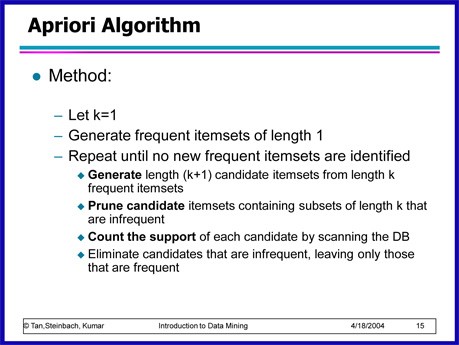

In [ ]:
df

In [ ]:
lst=[]
for i in range(0,len(df)-1):    
    data = df['itemDescription'][i].split(',')
    lst.append(data)

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(lst).transform(lst)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new

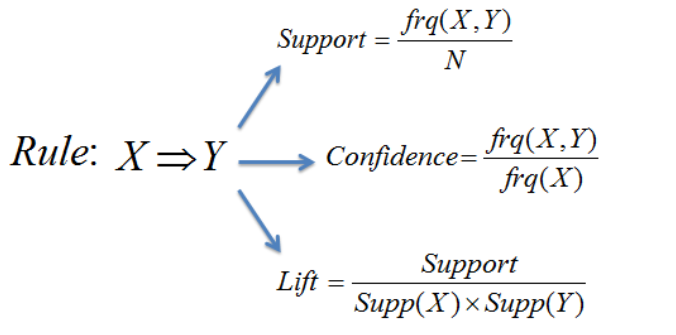

In [ ]:
frq_items = apriori(df_new, min_support=0.02,use_colnames=True)
frq_items

In [ ]:
rules = association_rules(frq_items, metric = "confidence", min_threshold = 0.1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules